## Assignment 1

In [38]:
## Importing required libraries

import numpy as np
import pandas as pd
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib.colors import ListedColormap

In [39]:
# reading input file
# given csv file is tab separated

df = pd.read_csv('cricketers.csv', sep="\t")

In [40]:
# clearing some common issues with data
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [41]:
# lookup sample records
df.head(10)

,player,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,Aaron Finch,10,9,134,46,100,16.75,144.00,0,0.0,0,0,0.00,0.00
1,AB de Villiers,12,11,480,90,275,53.33,174.54,0,0.0,0,0,0.00,0.00
2,Abhishek Sharma,3,3,63,46,33,63.00,190.90,0,0.0,0,0,0.00,0.00
3,Ajinkya Rahane,15,14,370,65,313,28.46,118.21,0,0.0,0,0,0.00,0.00
4,Alex Hales,6,6,148,45,118,24.66,125.42,0,0.0,0,0,0.00,0.00
5,Ambati Rayudu,16,16,602,100,402,43.00,149.75,0,0.0,0,0,0.00,0.00
6,Andre Russell,16,14,316,88,171,28.72,184.79,15,37.5,355,13,27.30,9.38
7,Andrew Tye,14,8,32,14,38,5.33,84.21,14,56.0,448,24,18.66,8.00
8,Axar Patel,9,8,80,19,69,13.33,115.94,8,26.0,218,3,72.66,8.38
9,Ben Cutting,9,6,96,37,58,24.00,165.51,7,17.0,168,2,84.00,9.88


In [42]:
# some standard description about data
df.describe()

,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.00000,109.000000,109.000000,109.000000
mean,9.559633,7.889908,173.633028,43.495413,124.669725,22.360092,122.258716,4.513761,13.894495,119.93578,3.926606,17.334862,5.149817
std,5.161164,4.982078,182.356522,29.830268,123.670265,16.093453,48.576709,5.449456,18.395495,152.80763,5.602094,21.910816,4.773435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-0.000000,0.000000
25%,5.000000,4.000000,36.000000,20.000000,33.000000,11.800000,109.090000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,10.000000,7.000000,99.000000,40.000000,76.000000,21.160000,130.260000,2.000000,3.000000,27.00000,0.000000,0.000000,7.280000
75%,14.000000,13.000000,260.000000,62.000000,188.000000,30.000000,146.040000,8.000000,26.000000,223.00000,6.000000,28.360000,9.230000
max,17.000000,17.000000,735.000000,128.000000,516.000000,75.830000,300.000000,17.000000,68.000000,533.00000,24.000000,108.000000,16.500000


In [43]:
# players who played 0 times

df[df['matches_played'] == 0]

,player,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
100,Akila Da0njaya,0,0,0,0,0,0.0,0.0,1,4.0,47,0,-0.00,11.75
101,Amit Mishra,0,0,0,0,0,0.0,0.0,10,37.0,264,12,22.00,7.13
102,Ankit Rajpoot,0,0,0,0,0,0.0,0.0,8,26.1,223,11,20.27,8.52
103,Ankit Sharma,0,0,0,0,0,0.0,0.0,1,1.0,11,0,-0.00,11.00
104,Anureet Singh,0,0,0,0,0,0.0,0.0,3,4.0,42,1,42.00,10.50
105,Avesh Khan,0,0,0,0,0,0.0,0.0,6,19.0,204,4,51.00,10.73
106,Barinder Sran,0,0,0,0,0,0.0,0.0,6,22.0,229,4,57.25,10.40
107,Basil Thampi,0,0,0,0,0,0.0,0.0,4,10.1,114,5,22.80,10.20
108,Ben Laughlin,0,0,0,0,0,0.0,0.0,7,21.0,212,9,22.44,10.04


In [44]:
## finding average runs

df['average_runs'].unique()

array([16.75, 53.33, 63.  , 28.46, 24.66, 43.  , 28.72,  5.33, 13.33,
       24.  , 16.33,  6.5 , 21.16, 25.  , 40.88, 32.73, 46.  ,  8.5 ,
       26.2 , 12.6 ,  5.66, 16.42, 13.  , 37.  , 16.66, 21.75, 49.8 ,
       35.25, 29.38, 32.4 , 17.  , 14.08,  9.66, 28.88, 60.  , 19.  ,
       22.91, 30.  , 12.25,  3.  , 54.8 , 36.  , 52.5 , 25.08, -0.  ,
       14.  , 22.8 , 54.91, 20.  , 13.75, 25.2 , 25.81, 15.66, 24.75,
       12.  , 10.5 , 19.25,  9.  , 12.5 , 75.83, 23.38, 30.6 ,  6.75,
       27.22, 25.12, 25.11, 11.8 , 12.75, 17.8 ,  7.25, 52.61, 21.93,
       23.83, 13.5 , 31.5 , 10.2 , 21.72, 39.64, 38.23,  4.33, 17.33,
       37.36, 33.83,  8.8 , 22.31, 37.08, 36.57, 26.  ,  7.66, 53.  ,
       48.18, 21.66, 15.25, 10.83])

In [45]:
df['bowling_economy'].unique()

array([ 0.  ,  9.38,  8.  ,  8.38,  9.88,  8.18,  7.66,  9.24, 10.21,
       10.36,  8.6 , 13.26,  6.33,  8.53,  7.28,  9.96,  8.25,  8.48,
        8.92,  9.54,  9.65,  8.36, 12.  ,  7.8 ,  7.07,  9.  , 10.  ,
       10.9 , 10.28,  7.36,  9.4 ,  8.95,  7.13,  8.4 ,  7.86,  6.73,
        8.09,  7.39,  8.96,  9.23,  9.64,  7.61, 16.5 ,  7.65, 11.6 ,
        9.6 ,  7.  , 11.5 , 11.75,  8.52, 11.  , 10.5 , 10.73, 10.4 ,
       10.2 , 10.04])

### Part 1 - Normalization of the data

In [46]:
# creating a copy for manipulation

df1 = df.copy()

In [47]:
# normalization the values - because the column data is not in range

minmax_scale = preprocessing.MinMaxScaler().fit(df1.iloc[:,1:])
df1.iloc[:,1:] = minmax_scale.transform(df1.iloc[:,1:])

In [48]:
# lookup some data
df1.head()

,player,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,Aaron Finch,0.588235,0.529412,0.182313,0.359375,0.193798,0.220889,0.480000,0.0,0.0,0.0,0.0,0.0,0.0
1,AB de Villiers,0.705882,0.647059,0.653061,0.703125,0.532946,0.703284,0.581800,0.0,0.0,0.0,0.0,0.0,0.0
2,Abhishek Sharma,0.176471,0.176471,0.085714,0.359375,0.063953,0.830806,0.636333,0.0,0.0,0.0,0.0,0.0,0.0
3,Ajinkya Rahane,0.882353,0.823529,0.503401,0.507812,0.606589,0.375313,0.394033,0.0,0.0,0.0,0.0,0.0,0.0
4,Alex Hales,0.352941,0.352941,0.201361,0.351562,0.228682,0.325201,0.418067,0.0,0.0,0.0,0.0,0.0,0.0


### Part 2

In [49]:
def kmeans(X,k,max_iterations=100):
    '''
    X: multidimensional data frame
    k: number of clusters
    max_iterations: number of repetitions before clusters are established
    Steps:
        1. Convert data to numpy aray
        2. Pick indices of k random point without replacement
        3. Find class (P) of each data point using euclidean distance
        4. Stop when max_iteration are reached of P matrix doesn't change
    Return:
        np.array: containg class of each data point and centroids
    '''
    if isinstance(X, pd.DataFrame):X = X.values
    idx = np.random.choice(len(X), k, replace=False)
    centroids = X[idx, :]
    P = np.argmin(distance.cdist(X, centroids, 'euclidean'),axis=1)
    for _ in range(max_iterations):
        centroids = np.vstack([X[P==i,:].mean(axis=0) for i in range(k)])
        tmp = np.argmin(distance.cdist(X, centroids, 'euclidean'),axis=1)
        if np.array_equal(P,tmp):break
        P = tmp
    return P, centroids

In [50]:
# taking average_runs and bowling_economy for clustering

df2 = df1[['average_runs','bowling_economy']]
df2.head()

,average_runs,bowling_economy
0,0.220889,0.0
1,0.703284,0.0
2,0.830806,0.0
3,0.375313,0.0
4,0.325201,0.0


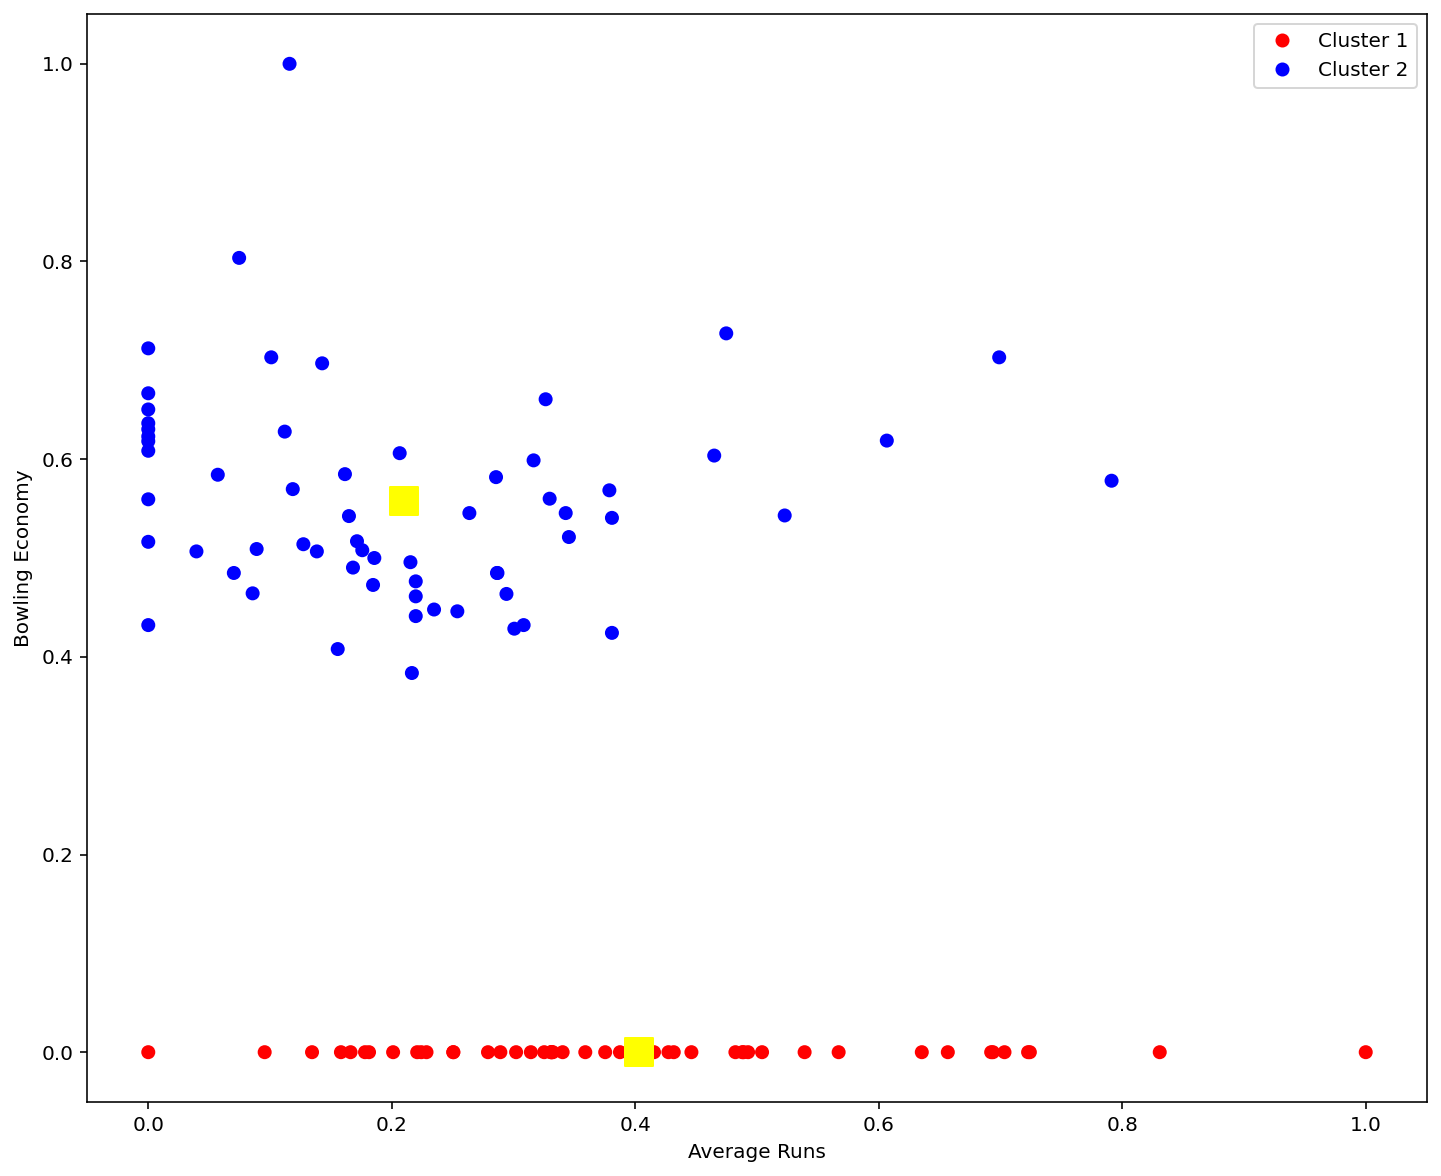

In [51]:
## with k = 2, two clusters

P, centroids = kmeans(df2, 2)
plt.figure(figsize=(12,10))
classes = ['Cluster 1', 'Cluster 2']
colours = ListedColormap(['red','blue'])
ax = plt.scatter(df2.iloc[:,0],df2.iloc[:,1],c=P, cmap = colours)
plt.scatter(centroids[0][0], centroids[0][1], s=200, c='yellow', marker='s')
plt.scatter(centroids[1][0], centroids[1][1], s=200, c='yellow', marker='s')
plt.xlabel("Average Runs")
plt.ylabel("Bowling Economy")
plt.legend(handles=ax.legend_elements()[0], labels=classes)
plt.show()

### Part - 3

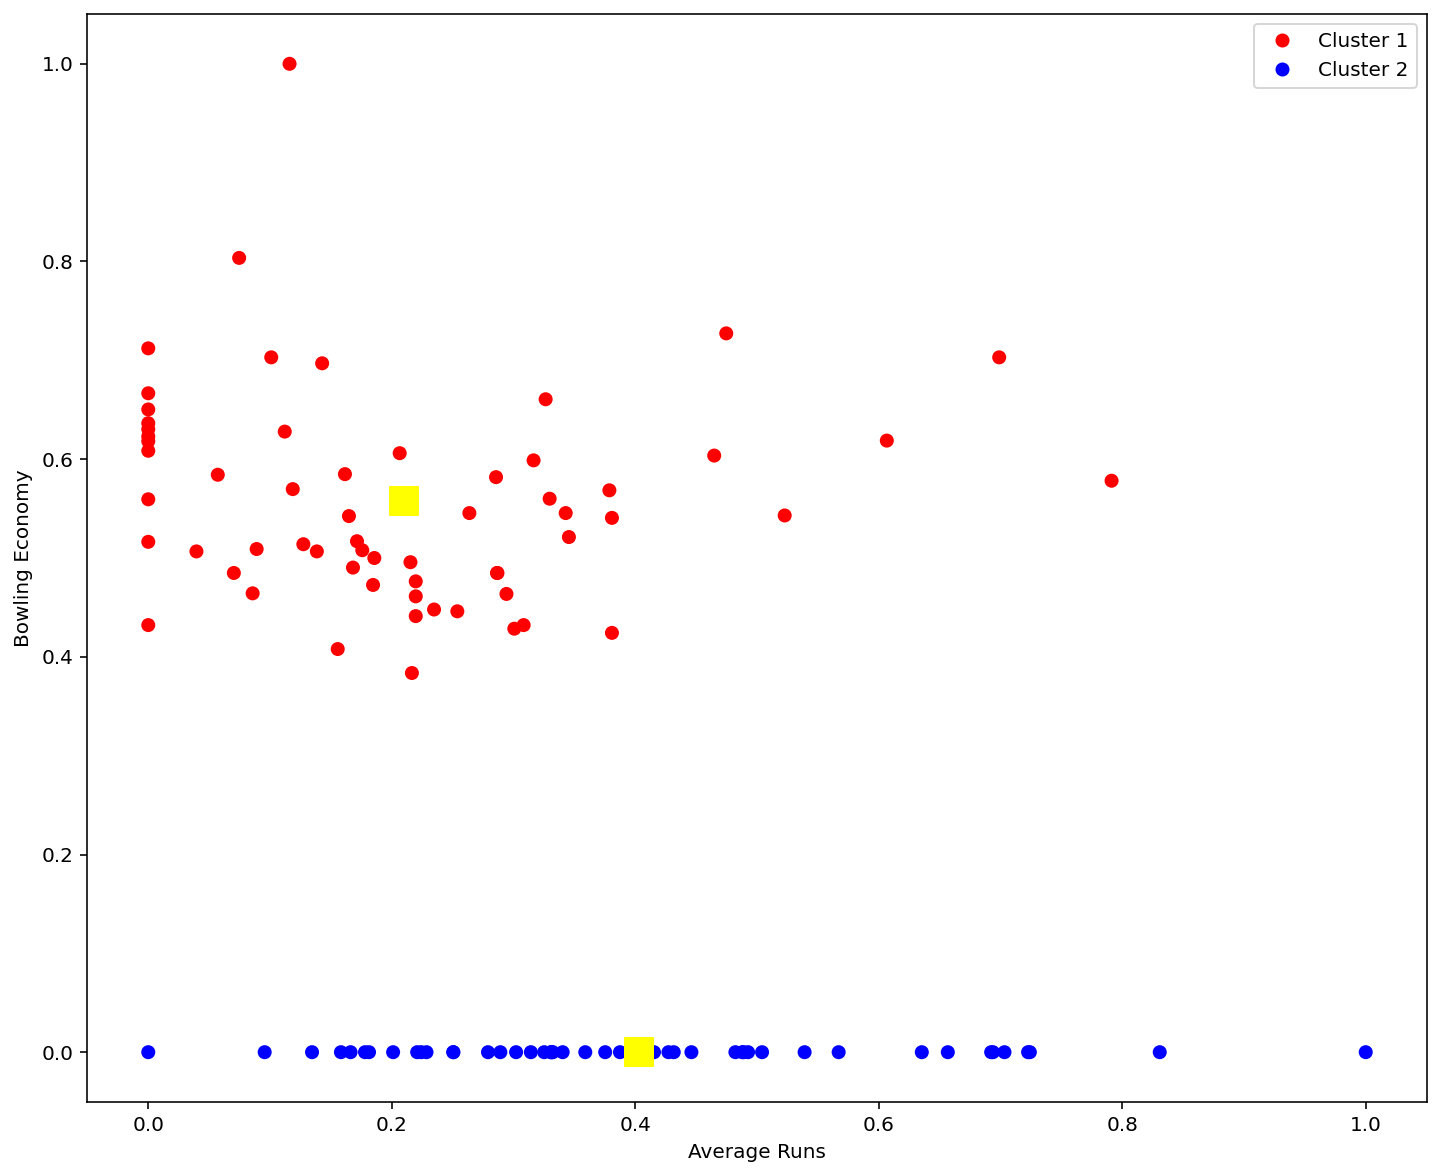

In [56]:
## with k = 2, two clusters

P, centroids = kmeans(df2, 2)
plt.figure(figsize=(12,10))
classes = ['Cluster 1', 'Cluster 2']
colours = ListedColormap(['red','blue'])
ax = plt.scatter(df2.iloc[:,0],df2.iloc[:,1],c=P, cmap = colours)
plt.scatter(centroids[0][0], centroids[0][1], s=200, c='yellow', marker='s')
plt.scatter(centroids[1][0], centroids[1][1], s=200, c='yellow', marker='s')
plt.xlabel("Average Runs")
plt.ylabel("Bowling Economy")
plt.legend(handles=ax.legend_elements()[0], labels=classes)
plt.show()

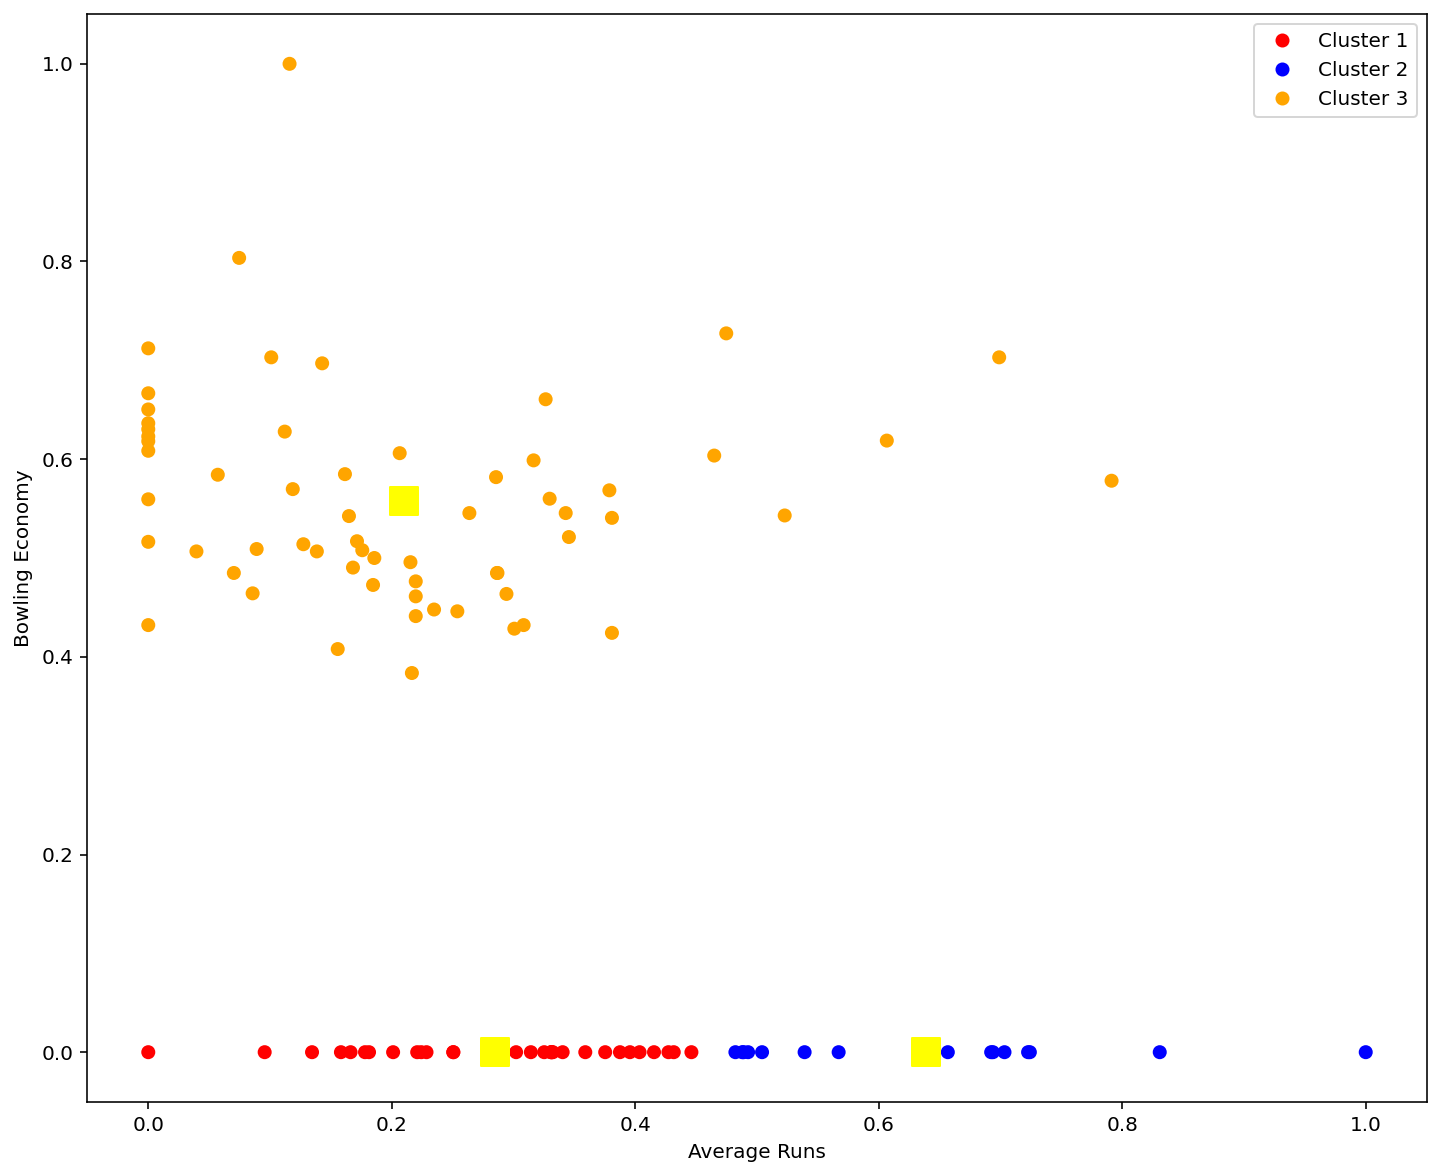

In [57]:
## with k = 3, three clusters

P, centroids = kmeans(df2, 3)
plt.figure(figsize=(12,10))
classes = ['Cluster 1', 'Cluster 2', 'Cluster 3']
colours = ListedColormap(['red','blue','orange'])
ax = plt.scatter(df2.iloc[:,0],df2.iloc[:,1],c=P, cmap = colours)
plt.scatter(centroids[0][0], centroids[0][1], s=200, c='yellow', marker='s')
plt.scatter(centroids[1][0], centroids[1][1], s=200, c='yellow', marker='s')
plt.scatter(centroids[2][0], centroids[2][1], s=200, c='yellow', marker='s')
plt.xlabel("Average Runs")
plt.ylabel("Bowling Economy")
plt.legend(handles=ax.legend_elements()[0], labels=classes)
plt.show()

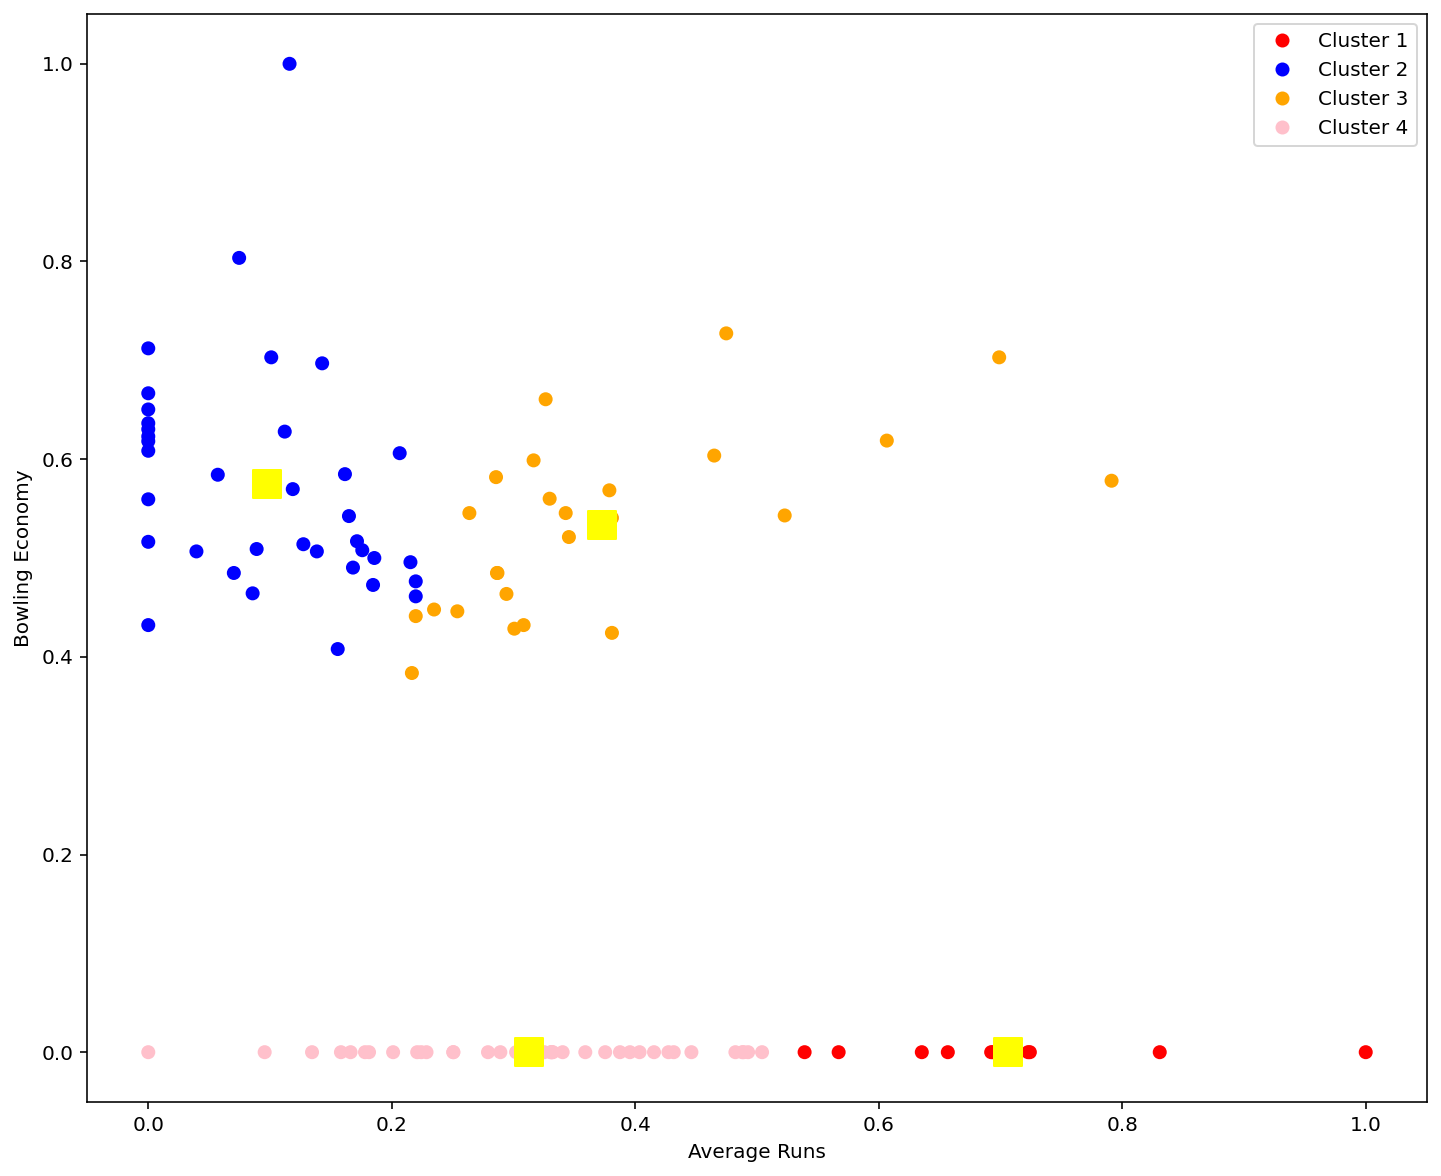

In [58]:
## with k = 4, four clusters

P, centroids = kmeans(df2, 4)
plt.figure(figsize=(12,10))
classes = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
colours = ListedColormap(['red','blue','orange','pink'])
ax = plt.scatter(df2.iloc[:,0],df2.iloc[:,1],c=P, cmap = colours)
plt.scatter(centroids[0][0], centroids[0][1], s=200, c='yellow', marker='s')
plt.scatter(centroids[1][0], centroids[1][1], s=200, c='yellow', marker='s')
plt.scatter(centroids[2][0], centroids[2][1], s=200, c='yellow', marker='s')
plt.scatter(centroids[3][0], centroids[3][1], s=200, c='yellow', marker='s')
plt.xlabel("Average Runs")
plt.ylabel("Bowling Economy")
plt.legend(handles=ax.legend_elements()[0], labels=classes)
plt.show()

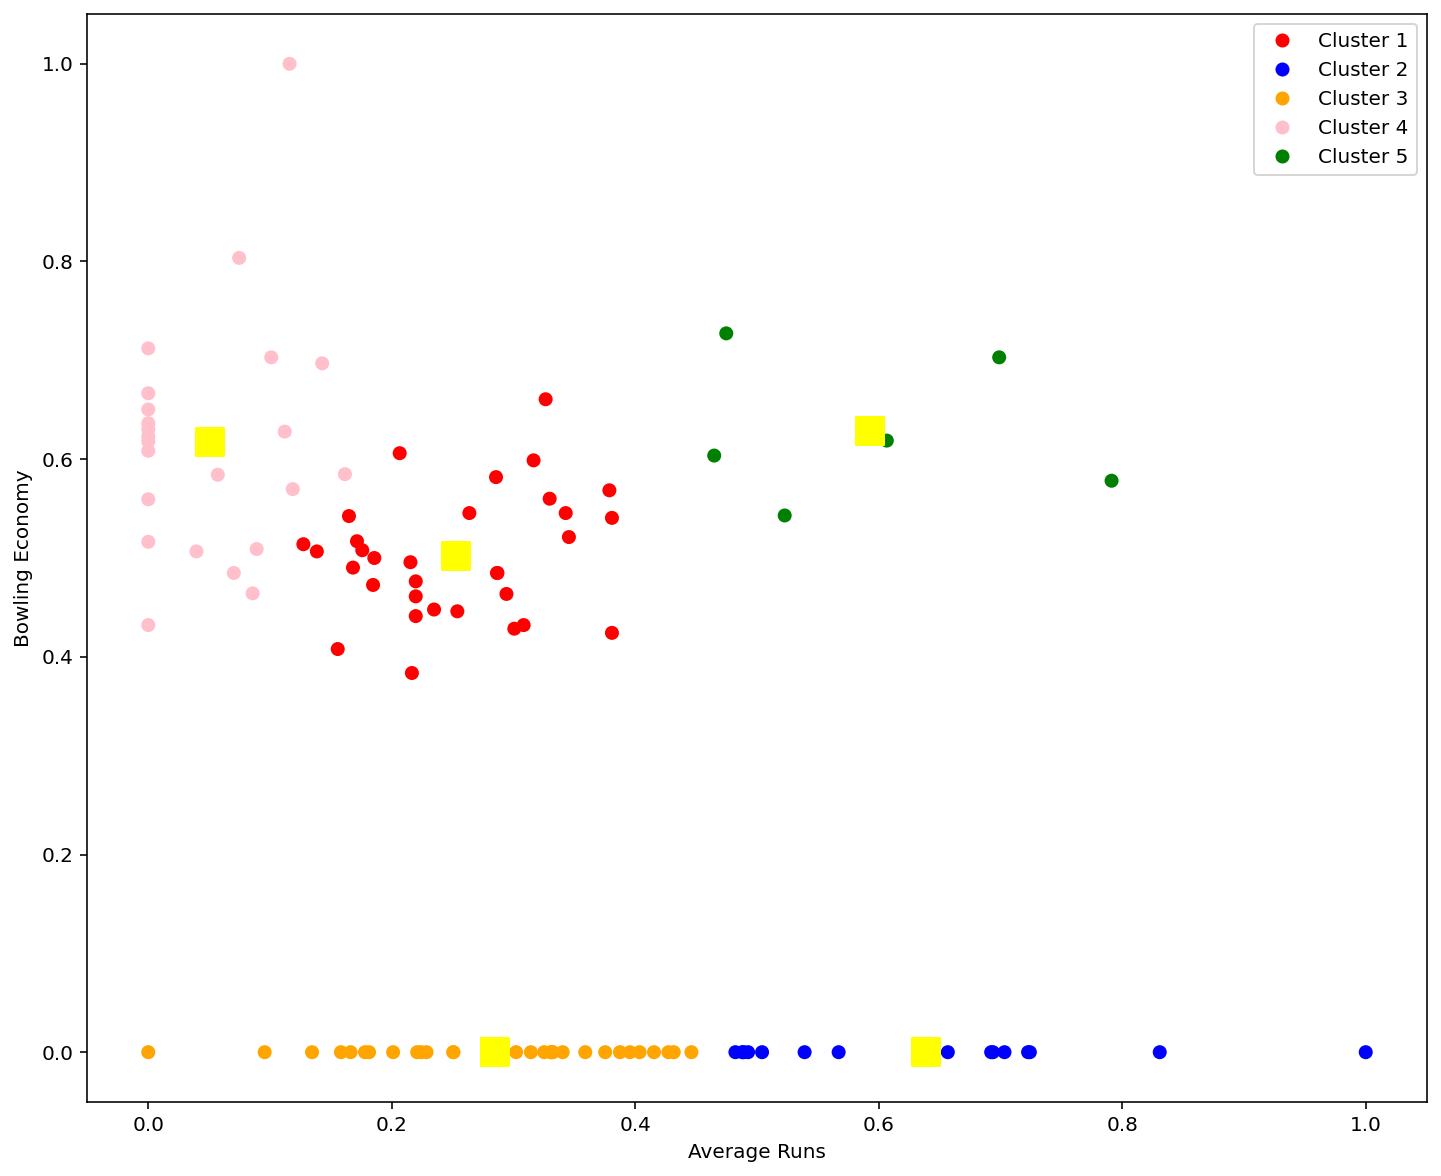

In [59]:
## with k = 5, five clusters

P, centroids = kmeans(df2, 5)
plt.figure(figsize=(12,10))
classes = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
colours = ListedColormap(['red','blue','orange','pink','green'])
ax = plt.scatter(df2.iloc[:,0],df2.iloc[:,1],c=P, cmap = colours)
plt.scatter(centroids[0][0], centroids[0][1], s=200, c='yellow', marker='s')
plt.scatter(centroids[1][0], centroids[1][1], s=200, c='yellow', marker='s')
plt.scatter(centroids[2][0], centroids[2][1], s=200, c='yellow', marker='s')
plt.scatter(centroids[3][0], centroids[3][1], s=200, c='yellow', marker='s')
plt.scatter(centroids[4][0], centroids[4][1], s=200, c='yellow', marker='s')
plt.xlabel("Average Runs")
plt.ylabel("Bowling Economy")
plt.legend(handles=ax.legend_elements()[0], labels=classes)
plt.show()

### Assignment - End